## Code to run Frozenlakes

#### Running VI and PI

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.desc to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.desc` for environment variables or `env.get_wrapper_attr('desc')` that will search the reminding wrappers.
  logger.warn(


Type of policy: <class 'tuple'>
Policy array: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Shape of policy array: (256,)
Unique actions in policy: [0]
All states have a valid policy.


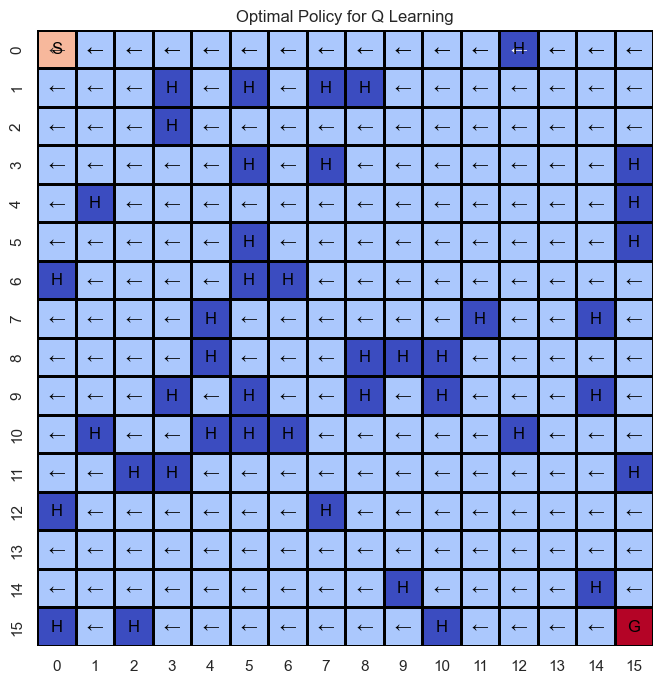

Value Function:
[[0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.
 

AttributeError: 'QLearning' object has no attribute 'iter'

In [3]:
import pandas as pd
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
from frozenlakes import MyMDPConverter, Qlearning, EpsilonGreedy, LearnerType, derive_state_matrices, run_env, postprocess, plot_states_actions_distribution, plot_q_values_map, Params, plot_steps_and_rewards
from pathlib import Path
import numpy as np
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
from plots import plot_policy, plot_value_function, plot_convergence, find_terminal_states, plot_value_iteration_results

from newPlots import print_value_iteration_results, plot_optimal_policy_with_holes
# CODE TO MOVE OUT: 
import numpy as np



params = Params(
    total_episodes=2000,
    learning_rate=0.01,
    gamma=0.9,
    epsilon=1,
    seed=26,
    is_slippery=True,
    n_runs=200,
    action_size=None,
    state_size=None,
    proba_frozen=0.85,
    savefig_folder=Path("./_static/img/tutorials/"),
)

# TODO: Set the learner type
learnerType = LearnerType.Q_LEARNING

# Set the seed
rng = np.random.default_rng(params.seed)

# Create the figure folder if it doesn't exists
params.savefig_folder.mkdir(parents=True, exist_ok=True)

map_sizes = [16]
res_all = pd.DataFrame()
st_all = pd.DataFrame()

for map_size in map_sizes:
    env = gym.make(
        "FrozenLake-v1",
        is_slippery=params.is_slippery,
        render_mode="rgb_array",
        desc=generate_random_map(
            size=map_size, p=params.proba_frozen, seed=params.seed
        ),
    )

    params = params._replace(action_size=env.action_space.n)
    params = params._replace(state_size=env.observation_space.n)

    env.action_space.seed(
        params.seed
    )

    c=1#TODO
    # if (learnerType == LearnerType.Q_LEARNING):
    if (c == 0):
        learner = Qlearning(
            learning_rate=params.learning_rate,
            gamma=params.gamma,
            state_size=params.state_size,
            action_size=params.action_size,
        )
    
        explorer = EpsilonGreedy(
            epsilon=params.epsilon,
            rng=rng
        )

        print(f"Map size: {map_size}x{map_size}")
        rewards, steps, episodes, qtables, all_states, all_actions = run_env(params, learner, env, explorer)

        # Save the results in dataframes
        res, st = postprocess(episodes, params, rewards, steps, map_size)
        res_all = pd.concat([res_all, res])
        st_all = pd.concat([st_all, st])
        qtable = qtables.mean(axis=0)  # Average the Q-table between runs

        plot_states_actions_distribution(
            states=all_states, actions=all_actions, map_size=map_size, params=params
        )  # Sanity check
        plot_q_values_map(qtable, env, map_size, params)
        plot_steps_and_rewards(res_all, st_all, params)
    else: 
        converter = MyMDPConverter(env)
        converter.convert_PR()

        # Now you can use converter.P and converter.R with MDPToolbox algorithms
        P = converter.P
        R = converter.R 


        if (learnerType == LearnerType.VALUE_ITERATION):
            learner = ValueIteration(P, R, params.gamma, epsilon=0.001, max_iter=1000)
        elif(learnerType == LearnerType.Q_LEARNING):
            # Initialize QLearning
            learner = QLearning(P, R, alpha=0.1, gamma=0.9, epsilon=0.1, n_iter=10000)
        else:
            learner = PolicyIteration(P, R, params.gamma)
        learner.run()
        # plot_policy(learner.policy, map_size)
        term_states = find_terminal_states(env)
        
        # Print the type of the policy to confirm what it is
        print("Type of policy:", type(learner.policy))
        
        # If the policy is a tuple, convert it to a NumPy array
        if isinstance(learner.policy, tuple):
            policy_array = np.array(learner.policy)
        else:
            policy_array = learner.policy  # If it's already an array, just use it as is

        # Now print the policy array and its shape
        print("Policy array:", policy_array)
        print("Shape of policy array:", policy_array.shape)

        # Verify the values in the policy:
        print("Unique actions in policy:", np.unique(policy_array))

        # Check if all states have a valid policy (no NaNs or unexpected values):
        if np.all(np.isfinite(policy_array)) and set(np.unique(policy_array)).issubset({0, 1, 2, 3}):
            print("All states have a valid policy.")
        else:
            print("There are states with an invalid policy.")
        desc = env.unwrapped.desc
        plot_optimal_policy_with_holes(learner.policy, desc, map_size, learnerType)
        
        print_value_iteration_results(learner, map_size)

        # plot_value_iteration_results(learner.V, learner.policy, env, map_size)
        # plot_value_function(learner.V, map_size)
        # plot_convergence(learner.run_stats, title='Value Iteration Convergence')


env.close()

### Initial Code

t [[[0.66666667 0.         0.33333333 0.        ]
  [0.33333333 0.33333333 0.         0.33333333]
  [0.33333333 0.         0.66666667 0.        ]
  [0.         0.         0.         1.        ]]

 [[0.33333333 0.33333333 0.33333333 0.        ]
  [0.33333333 0.33333333 0.         0.33333333]
  [0.         0.         0.66666667 0.33333333]
  [0.         0.         0.         1.        ]]

 [[0.33333333 0.33333333 0.33333333 0.        ]
  [0.         0.66666667 0.         0.33333333]
  [0.33333333 0.         0.33333333 0.33333333]
  [0.         0.         0.         1.        ]]

 [[0.66666667 0.33333333 0.         0.        ]
  [0.33333333 0.66666667 0.         0.        ]
  [0.33333333 0.         0.33333333 0.33333333]
  [0.         0.         0.         1.        ]]]
r [[0. 0. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 1. 1.]
 [0. 0. 0. 0.]]
Type of policy: <class 'tuple'>
Policy array: [1 2 1 0]
Shape of policy array: (4,)
Unique actions in policy: [0 1 2]
All states have a valid policy.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.desc to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.desc` for environment variables or `env.get_wrapper_attr('desc')` that will search the reminding wrappers.
  logger.warn(


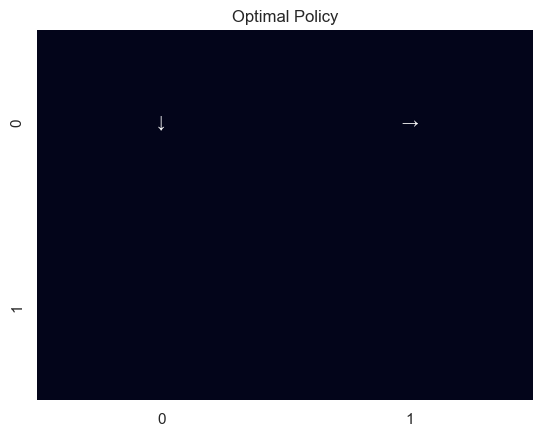

Size of V: 4
V: (2.1427474581338273, 2.499945157623399, 2.499945157623399, 0.0)


TypeError: Wrapper.render() got an unexpected keyword argument 'mode'

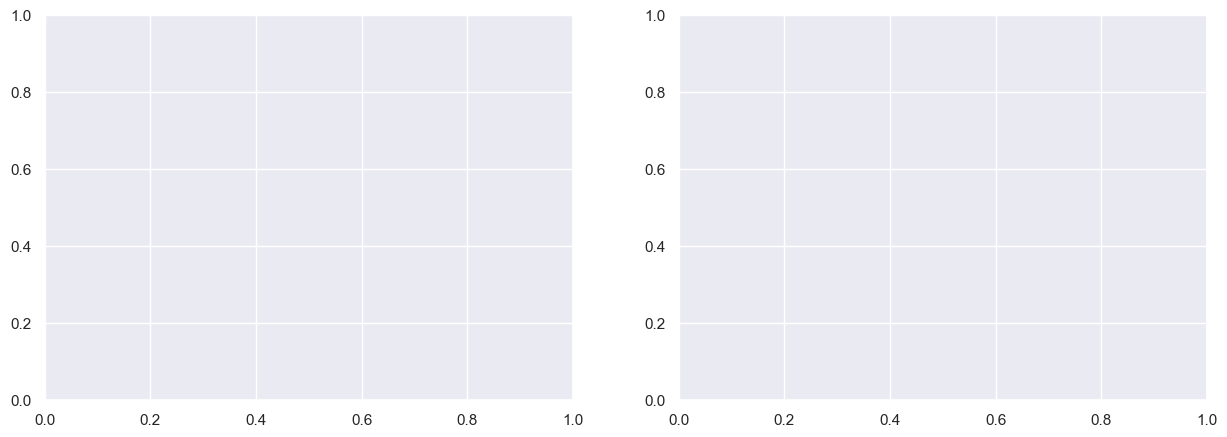

In [3]:
import pandas as pd
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
from frozenlakes import Qlearning, EpsilonGreedy, LearnerType, derive_state_matrices, run_env, postprocess, plot_states_actions_distribution, plot_q_values_map, Params, plot_steps_and_rewards
from pathlib import Path
import numpy as np
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration
from plots import plot_policy, plot_value_function, plot_convergence, find_terminal_states, plot_value_iteration_results
params = Params(
    total_episodes=2000,
    learning_rate=0.01,
    gamma=0.9,
    epsilon=1,
    seed=26,
    is_slippery=True,
    n_runs=200,
    action_size=None,
    state_size=None,
    proba_frozen=0.85,
    savefig_folder=Path("./_static/img/tutorials/"),
)

# TODO: Set the learner type
learnerType = LearnerType.VALUE_ITERATION

# Set the seed
rng = np.random.default_rng(params.seed)

# Create the figure folder if it doesn't exists
params.savefig_folder.mkdir(parents=True, exist_ok=True)

map_sizes = [2]
res_all = pd.DataFrame()
st_all = pd.DataFrame()

for map_size in map_sizes:
    env = gym.make(
        "FrozenLake-v1",
        is_slippery=params.is_slippery,
        render_mode="rgb_array",
        desc=generate_random_map(
            size=map_size, p=params.proba_frozen, seed=params.seed
        ),
    )

    params = params._replace(action_size=env.action_space.n)
    params = params._replace(state_size=env.observation_space.n)

    env.action_space.seed(
        params.seed
    )
 
    if (learnerType == LearnerType.Q_LEARNING):
        learner = Qlearning(
            learning_rate=params.learning_rate,
            gamma=params.gamma,
            state_size=params.state_size,
            action_size=params.action_size,
        )
    
        explorer = EpsilonGreedy(
            epsilon=params.epsilon,
            rng=rng
        )

        print(f"Map size: {map_size}x{map_size}")
        rewards, steps, episodes, qtables, all_states, all_actions = run_env(params, learner, env, explorer)

        # Save the results in dataframes
        res, st = postprocess(episodes, params, rewards, steps, map_size)
        res_all = pd.concat([res_all, res])
        st_all = pd.concat([st_all, st])
        qtable = qtables.mean(axis=0)  # Average the Q-table between runs

        plot_states_actions_distribution(
            states=all_states, actions=all_actions, map_size=map_size, params=params
        )  # Sanity check
        plot_q_values_map(qtable, env, map_size, params)
        plot_steps_and_rewards(res_all, st_all, params)
    else: 
        T, R = derive_state_matrices(env)
        print("t", T)
        print("r", R)

        if (learnerType == LearnerType.VALUE_ITERATION):
            learner = ValueIteration(T, R, params.gamma, epsilon=0.001, max_iter=1000)
        else:
            learner = PolicyIteration(T, R, params.gamma)
        learner.run()
        # plot_policy(learner.policy, map_size)
        term_states = find_terminal_states(env)
        
        # Print the type of the policy to confirm what it is
        print("Type of policy:", type(learner.policy))
        
        # If the policy is a tuple, convert it to a NumPy array
        if isinstance(learner.policy, tuple):
            policy_array = np.array(learner.policy)
        else:
            policy_array = learner.policy  # If it's already an array, just use it as is

        # Now print the policy array and its shape
        print("Policy array:", policy_array)
        print("Shape of policy array:", policy_array.shape)

        # Verify the values in the policy:
        print("Unique actions in policy:", np.unique(policy_array))

        # Check if all states have a valid policy (no NaNs or unexpected values):
        if np.all(np.isfinite(policy_array)) and set(np.unique(policy_array)).issubset({0, 1, 2, 3}):
            print("All states have a valid policy.")
        else:
            print("There are states with an invalid policy.")

        
        plot_policy(learner.policy, map_size, terminal_states=term_states) # Assuming 15 is the goal state
        print("Size of V:", len(learner.V))
        print("V:", learner.V)

        plot_value_iteration_results(learner.V, learner.policy, env, map_size)
        plot_value_function(learner.V, map_size)
        plot_convergence(learner.run_stats, title='Value Iteration Convergence')


env.close()

## MDP Non-Grid Problem

In [52]:
import mdptoolbox, mdptoolbox.example
import numpy as np

P, R = mdptoolbox.example.forest(S=10, r1=4, r2=2, p=0.1)

vi = mdptoolbox.mdp.ValueIteration(P, R, 0.9)
vi.run()
print("Value Iteration Policy:", vi.policy)


pi = mdptoolbox.mdp.PolicyIteration(P, R, 0.9)
pi.run()
print("Policy Iteration Policy:", pi.policy)

ql = mdptoolbox.mdp.QLearning(P, R, 0.9)
ql.run()
print("Q-Learning Policy:", ql.policy)


Value Iteration Policy: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Policy Iteration Policy: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Q-Learning Policy: (0, 1, 0, 0, 0, 1, 0, 1, 1, 0)
